In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.cluster.hierarchy as shc

from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

from sklearn.metrics import confusion_matrix

from sklearn import datasets

%matplotlib inline
pd.set_option("display.max_columns", None)

In [2]:
# load in the data
airbnb = pd.read_csv("filtered_nyc_airbnb_2019.csv")
airbnb = airbnb.dropna()
airbnb.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [3]:
# remove boroughs and room types
X = airbnb.iloc[:, [7, 8, 10, 11, 12, 14, 15, 16]]
X.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,0.21,6,365
1,40.75362,-73.98377,225,1,45,0.38,2,355
3,40.68514,-73.95976,89,1,270,4.64,1,194
4,40.79851,-73.94399,80,10,9,0.10,1,0
5,40.74767,-73.97500,200,3,74,0.59,1,129


In [4]:
# scale the data 
scaler = MinMaxScaler(feature_range=(0, 1))
airbnb_scaled = scaler.fit_transform(X)

In [5]:
# turn the scaled data back to a dataframe
airbnb_scaled = pd.DataFrame(airbnb_scaled, columns = X.columns)
airbnb_scaled.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,0.346932,0.511921,0.298,0.000000,0.012739,0.003419,0.015337,1.000000
1,0.607918,0.490469,0.450,0.000000,0.070064,0.006326,0.003067,0.972603
2,0.439518,0.535649,0.178,0.000000,0.428344,0.079159,0.000000,0.531507
3,0.718308,0.565324,0.160,0.300000,0.012739,0.001539,0.000000,0.000000
4,0.593287,0.506972,0.400,0.066667,0.116242,0.009916,0.000000,0.353425


In [6]:
# run k-means clustering on the data
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_clusters = kmeans.fit_predict(airbnb_scaled)
kmeans_clusters

array([0, 0, 0, ..., 2, 2, 2])

In [7]:
# add the clusters to the dataset
airbnb["kmeans_clusters"] = kmeans_clusters

In [8]:
airbnb["room_type"].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [9]:
first_kmean_cluster_filter = airbnb["kmeans_clusters"] == 0
first_kmean_cluster = airbnb[first_kmean_cluster_filter]
first_kmean_cluster.sample(15)

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,kmeans_clusters
27649,28747,22214395,Spacious Studio In Queens,162276183,Gary,Queens,Rego Park,40.71663,-73.85823,Entire home/apt,59,1,110,2019-06-24,5.92,1,147,0
29157,30311,23433518,New Tidy room plus private entrance PAID par...,124860677,Jim&Lisa,Queens,Flushing,40.75522,-73.81259,Private room,46,2,26,2019-05-26,1.65,6,180,0
22210,23133,18734125,Large Industrial Loft In Bushwick,81066021,Javerick,Brooklyn,Williamsburg,40.70608,-73.93130,Entire home/apt,158,3,2,2017-07-22,0.08,2,324,0
22110,23031,18649806,Cozy 1 Bedroom with Queen bed,44838931,Andrea,Queens,Astoria,40.76848,-73.93213,Private room,62,3,27,2019-07-02,1.03,2,154,0
35195,36578,29081056,Cozy & Large NYC Private Suite!,48954003,Bradley,Bronx,Olinville,40.88453,-73.86273,Private room,80,2,20,2019-05-03,2.20,1,188,0
15737,16419,13184355,Spacious bushwick brownstone,73737053,Elicia,Brooklyn,Bushwick,40.69239,-73.91416,Private room,85,1,44,2019-06-23,1.26,3,365,0
16920,17631,13864551,Comfy Room in Amazing East Village Apt,4396,Casey,Manhattan,East Village,40.72309,-73.98428,Private room,74,1,2,2016-11-06,0.05,2,188,0
12922,13495,10101135,Room Near JFK Twin Beds,47621202,Dona,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,2019-06-27,13.40,2,173,0
19406,20238,16190577,Private room with private bathroom,43729733,Rod,Manhattan,East Harlem,40.78565,-73.94268,Private room,150,1,56,2019-06-24,1.79,1,272,0
41383,43069,33429269,Big Room space in Harlem,22222260,Simone,Manhattan,Harlem,40.81824,-73.93832,Private room,81,4,4,2019-05-24,1.30,2,291,0


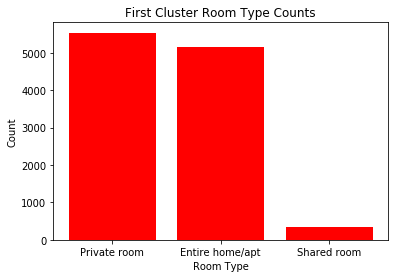

In [10]:
vc = first_kmean_cluster["room_type"].value_counts()
plt.bar(vc.index, vc.values, color = "red")
plt.title("First Cluster Room Type Counts")
plt.xlabel("Room Type")
plt.ylabel("Count")
plt.savefig("plots/first_cluster_room_type.png")

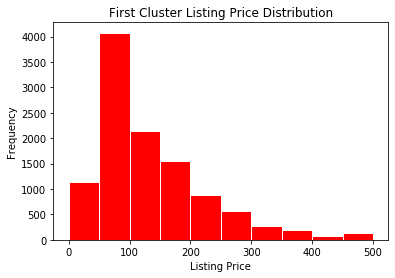

In [11]:
first_kmean_cluster["price"].hist(grid = False, edgecolor = "white", color = "red")
plt.title("First Cluster Listing Price Distribution")
plt.xlabel("Listing Price")
plt.ylabel("Frequency")
plt.savefig("plots/first_cluster_price_dist.png")

In [12]:
second_kmean_cluster_filter = airbnb["kmeans_clusters"] == 1
second_kmean_cluster = airbnb[second_kmean_cluster_filter]
second_kmean_cluster.sample(15)

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,kmeans_clusters
4789,5093,3662724,5144-Prime Doorman!78ST & Madison,16098958,Jeremy & Laura,Manhattan,Upper East Side,40.77448,-73.96102,Entire home/apt,175,30,2,2019-05-30,0.06,96,281,1
40055,41683,32407324,"NEW Luxury 1BR, Floor to ceiling windows, balcony",122559140,Javicia,Brooklyn,Fort Greene,40.68912,-73.97903,Entire home/apt,133,25,1,2019-07-01,1.00,1,0,1
36514,37943,30006962,"Sharp Wall Street 1BR w/ Gym, Doorman, Roof de...",107434423,Blueground,Manhattan,Financial District,40.70497,-74.00746,Entire home/apt,267,30,1,2019-03-20,0.27,232,189,1
18383,19161,15234755,Luxury One Bedroom,10528,Olivier,Manhattan,Upper West Side,40.77727,-73.98453,Entire home/apt,200,30,9,2019-02-09,0.28,2,139,1
5567,5894,4295603,Beautiful Loft in flawless factory conversion,7503643,Vida,Brooklyn,Greenpoint,40.72550,-73.94090,Entire home/apt,129,30,1,2015-03-27,0.02,52,300,1
27969,29080,22349506,Shared room in nice surroundings in Ridgewood!!,134293540,Valentin,Queens,Ridgewood,40.70615,-73.90367,Shared room,27,31,5,2018-07-06,0.27,4,6,1
25543,26569,21140951,2BED 2BATH PRIVATE BALCONY / COLUMBUS CIRCLE,131647128,Emily,Manhattan,Upper West Side,40.77576,-73.98883,Entire home/apt,290,30,4,2019-05-24,0.22,25,281,1
19729,20573,16357148,Private Room in Sun-drenched Apartment,46416490,Anne,Manhattan,Harlem,40.80883,-73.94577,Private room,68,30,20,2018-09-14,0.65,1,15,1
43717,45505,34793874,Upper East Side! Studio Near Museum Mile!,256718270,Tara,Manhattan,Upper East Side,40.77932,-73.95343,Entire home/apt,109,30,2,2019-06-01,1.43,1,197,1
29180,30334,23451337,Spacious fully furnished studio apartment,83786650,Bridge,Manhattan,Upper East Side,40.75988,-73.96115,Entire home/apt,100,30,5,2019-04-30,0.34,8,229,1


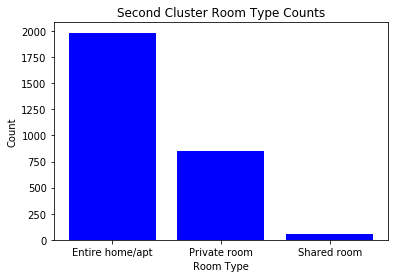

In [13]:
vc = second_kmean_cluster["room_type"].value_counts()
plt.bar(vc.index, vc.values, color = "b")
plt.title("Second Cluster Room Type Counts")
plt.xlabel("Room Type")
plt.ylabel("Count")
plt.savefig("plots/second_cluster_room_type.png")

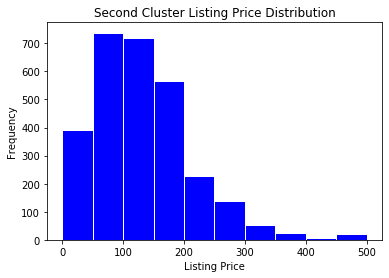

In [14]:
second_kmean_cluster["price"].hist(grid = False, edgecolor = "white", color = "b")
plt.title("Second Cluster Listing Price Distribution")
plt.xlabel("Listing Price")
plt.ylabel("Frequency")
plt.savefig("plots/second_cluster_price_dist.png")

In [15]:
third_kmean_cluster_filter = airbnb["kmeans_clusters"] == 2
third_kmean_cluster = airbnb[third_kmean_cluster_filter]
third_kmean_cluster.sample(15)

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,kmeans_clusters
21237,22131,17812444,3 bedroom in the heart of the west village,54850437,Lauren,Manhattan,West Village,40.73581,-74.00666,Entire home/apt,185,4,22,2019-07-02,0.81,1,22,2
14834,15476,12408850,1 BR in 2 BR Apt (Upper East Side),67105547,Jeffrey Paul,Manhattan,East Harlem,40.78898,-73.95478,Private room,62,1,32,2018-10-01,0.83,1,0,2
39917,41535,32291386,Super Luxury! XL Alcove Studio in heart of Che...,21127860,Carol,Manhattan,Chelsea,40.74101,-73.99471,Entire home/apt,215,2,12,2019-06-07,2.55,1,128,2
36655,38090,30071866,Brooklyn based 1 bedroom apartment,22723123,Maximilian,Brooklyn,Downtown Brooklyn,40.69115,-73.98466,Entire home/apt,99,3,1,2019-04-28,0.41,1,31,2
32967,34259,27173512,Awesome Apartment near Prospect Park,23371413,Amit,Brooklyn,Crown Heights,40.66483,-73.95883,Entire home/apt,110,4,2,2018-09-16,0.20,1,32,2
38107,39637,30854157,"Renovated pre-war flat, terrace, & garden",230683611,Melissa,Manhattan,Hell's Kitchen,40.76238,-73.99259,Entire home/apt,180,2,2,2019-02-21,0.32,1,0,2
2581,2731,1474980,Be my Guest! Cozy East Village apt!,823392,Karen,Manhattan,East Village,40.72247,-73.97947,Private room,73,12,11,2019-06-29,0.16,1,21,2
20145,20999,16630483,"SPACIOUS, trendy Flatiron Apt-Traveler's Deli...",107459717,Matt,Manhattan,Kips Bay,40.73945,-73.98273,Entire home/apt,144,2,2,2018-12-16,0.08,1,0,2
21260,22154,17839944,CUTE ROOM - Times Square-19minutes,122026078,Shah Memo,Manhattan,Harlem,40.81703,-73.95250,Private room,64,2,8,2019-06-23,0.29,3,98,2
28852,29995,23091275,Modern Studio Apartment,49258234,Sophie,Manhattan,Midtown,40.76540,-73.98039,Entire home/apt,160,2,3,2018-03-11,0.17,1,0,2


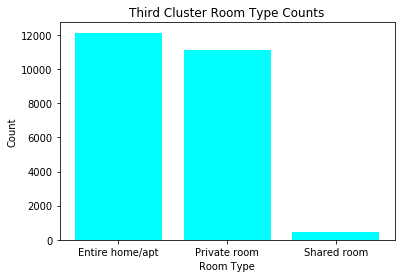

In [16]:
vc = third_kmean_cluster["room_type"].value_counts()
plt.bar(vc.index, vc.values, color = "cyan")
plt.title("Third Cluster Room Type Counts")
plt.xlabel("Room Type")
plt.ylabel("Count")
plt.savefig("plots/third_cluster_room_type.png")

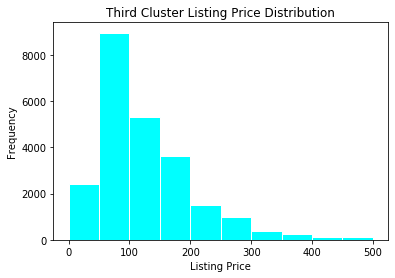

In [17]:
third_kmean_cluster["price"].hist(grid = False, edgecolor = "white", color = "cyan")
plt.title("Third Cluster Listing Price Distribution")
plt.xlabel("Listing Price")
plt.ylabel("Frequency")
plt.savefig("plots/third_cluster_price_dist.png")

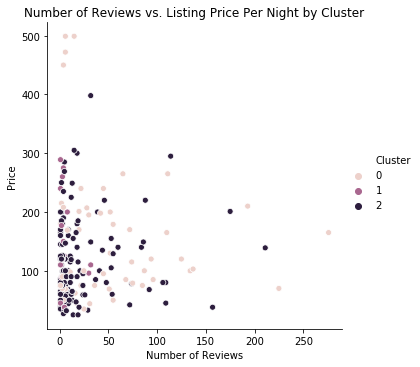

In [36]:
airbnb_sample = airbnb.sample(200)
airbnb_sample["Cluster"] = airbnb_sample["kmeans_clusters"]
sns.relplot(x = "number_of_reviews", y = "price", hue = "Cluster", data = airbnb_sample)
plt.title("Number of Reviews vs. Listing Price Per Night by Cluster")
plt.xlabel("Number of Reviews")
plt.ylabel("Price")
plt.savefig("plots/cluster_visualization.png")

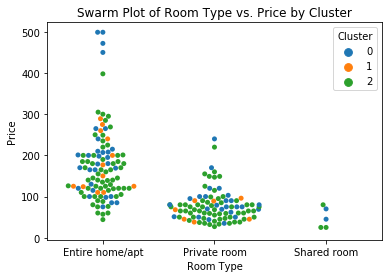

In [37]:
import seaborn as sns
# Swarm plot
sns.swarmplot(x= "room_type", y="price", hue = "Cluster", data = airbnb_sample)
plt.title("Swarm Plot of Room Type vs. Price by Cluster")
plt.xlabel("Room Type")
plt.ylabel("Price")
plt.savefig("plots/cluster_visualization2")

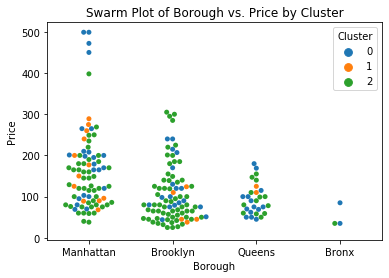

In [38]:
sns.swarmplot(x= "neighbourhood_group", y="price", hue = "Cluster", data = airbnb_sample)
plt.title("Swarm Plot of Borough vs. Price by Cluster")
plt.xlabel("Borough")
plt.ylabel("Price")
plt.savefig("plots/cluster_visualization3")

In [23]:
print("Cluster 1 Size: " + str(len(first_kmean_cluster)))
print("Cluster 2 Size: " + str(len(second_kmean_cluster)))
print("Cluster 3 Size: " + str(len(third_kmean_cluster)))

Cluster 1 Size: 11044
Cluster 2 Size: 2890
Cluster 3 Size: 23655
